<a href="https://colab.research.google.com/github/fbelinchon/BigMart_2013_sales/blob/master/Vidhya_BigMark_2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytics Vidhya BigMarket 2013 sales


## Google Drive Connection


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!ln -fs '../gdrive/My Drive/data' '/content'

## Read csv

In [0]:
from fastai.tabular import *
import json
import pdb

In [0]:
path = pathlib.Path('/content/data/BigMark/')
df_train = pd.read_csv(path/'Train_UWu5bXk.csv')
df_test = pd.read_csv(path/'Test_u94Q5KV.csv')


In [0]:
df_train.shape


(8523, 12)

## Data Cleaning

### Item Fat Content

In [0]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
def ItemFat_Cleaning(df):
    df['Item_Fat_Content'] =df['Item_Fat_Content'].map(lambda x: 'Low Fat' if (x == 'LF' or x == 'low fat') else x)
    df['Item_Fat_Content'] =df['Item_Fat_Content'].map(lambda x: 'Regular' if (x == 'reg') else x)

In [0]:
ItemFat_Cleaning(df_train)
ItemFat_Cleaning(df_test)

In [7]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### Cleaning Item Type

In [0]:
def createItemCode3(df):
    df['Item_identifierCode3']=df['Item_Identifier'].map(lambda x: x[:3])

In [0]:
createItemCode3(df_train)
createItemCode3(df_test)

In [11]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifierCode3
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FDP
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FDO
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FDP
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,FDH
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,FDU


In [12]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
meanTable=df_train.groupby('Item_Identifier')['Item_Weight'].transform('mean')
meanTable_id=df_train[df_train['Item_Weight'].isnull()].groupby('Item_Identifier')['Item_Weight'].mean()

In [0]:
df_train.loc[df_train['Item_Weight'].isnull(),'Item_Weight']=meanTable

In [145]:
df_train.loc[df_train['Item_Weight'].isnull(),['Item_Identifier','Item_Weight']].apply(lambda x: x['Item_Identifier'])

KeyError: ignored

In [133]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
meanTableTest=df_test.groupby('Item_Identifier')['Item_Weight'].transform('mean')

In [0]:
df_test.loc[df_test['Item_Weight'].isnull(),'Item_Weight']=meanTableTest

In [19]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5661.000000,5681.000000,5681.000000,5681.000000
mean,12.675976,0.065684,141.023273,1997.828903
std,4.657559,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.630000,0.027047,94.412000,1987.000000
50%,12.350000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [20]:
df_test.loc[df_test['Item_Weight'].isnull()]['Item_Identifier'].value_counts()

FDL58    2
FDG50    2
FDF22    2
FDI45    2
FDO22    1
FDF05    1
FDG57    1
FDG09    1
FDT21    1
FDF04    1
DRN47    1
FDH58    1
FDP28    1
FDJ09    1
FDY57    1
NCJ30    1
Name: Item_Identifier, dtype: int64

In [0]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5661.000000,5681.000000,5681.000000,5681.000000
mean,12.675976,0.065684,141.023273,1997.828903
std,4.657559,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.630000,0.027047,94.412000,1987.000000
50%,12.350000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [0]:
df_train.loc[df_train['Item_Identifier'] == 'FDK57']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifierCode3
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228,FDK


In [0]:
df_train.loc[df_train['Item_Identifier'].isin(['FDL58','FDG50','FDF22','FDI45','FDF05','FDY57','FDT21','FDG09','FDH58','FDO22','NCJ30','FDF04','FDP28','FDJ09','DRN47','FDG57'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifierCode3
191,FDL58,5.780,Regular,0.074264,Snack Foods,264.7568,OUT049,1999,Medium,Tier 1,Supermarket Type1,4745.8224,FDL
212,FDL58,5.780,Regular,0.000000,Snack Foods,263.7568,OUT017,2007,NaN,Tier 2,Supermarket Type1,2636.5680,FDL
217,FDP28,13.650,Regular,0.134976,Frozen Foods,260.0936,OUT010,1998,NaN,Tier 3,Grocery Store,260.9936,FDP
249,FDF05,17.500,Low Fat,0.027023,Frozen Foods,262.4910,OUT017,2007,NaN,Tier 2,Supermarket Type1,5259.8200,FDF
360,DRN47,12.100,Low Fat,0.016895,Hard Drinks,178.5660,OUT018,2009,Medium,Tier 3,Supermarket Type2,898.8300,DRN
406,FDF22,6.865,Low Fat,0.056919,Snack Foods,212.8218,OUT049,1999,Medium,Tier 1,Supermarket Type1,5770.4886,FDF
566,FDL58,5.780,Regular,0.074299,Snack Foods,264.9568,OUT045,2002,NaN,Tier 2,Supermarket Type1,1845.5976,FDL
570,FDO22,13.500,Regular,0.017960,Snack Foods,81.5960,OUT017,2007,NaN,Tier 2,Supermarket Type1,639.1680,FDO
594,NCJ30,5.820,Low Fat,0.080640,Household,167.7790,OUT046,1997,Small,Tier 1,Supermarket Type1,2886.2430,NCJ
688,FDG09,20.600,Regular,0.047927,Fruits and Vegetables,185.9556,OUT035,2004,Small,Tier 2,Supermarket Type1,4318.3788,FDG


In [25]:
len(df_train['Item_identifierCode3'].value_counts())

71

#Model Train



## Model

In [0]:
dep_var = 'Item_Outlet_Sales'
cat_names = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type','Outlet_Type']
cont_names = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
procs = [FillMissing, Categorify, Normalize]

In [0]:
df_test_cp=df_test.copy()

In [0]:
df_test_cp['Item_Outlet_Sales']=0

In [0]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_identifierCode3
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDW
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDW
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NCN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDQ
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FDY


In [0]:
test = TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names)
data = (TabularList.from_df(df_train.copy(), path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(7500,8523)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
#learn = tabular_learner(data, layers=[900,500], ps=[0.001,0.01,0.1], emb_drop=0.04,metrics=root_mean_squared_error)
learn = tabular_learner(data, layers=[900,500,400],metrics=root_mean_squared_error)

In [74]:

learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(17, 8)
    (2): Embedding(11, 6)
    (3): Embedding(10, 6)
    (4): Embedding(4, 3)
    (5): Embedding(4, 3)
    (6): Embedding(5, 4)
    (7): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=39, out_features=900, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=900, out_features=500, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=400, bias=True)
    (7): ReLU(inplace)
    (8): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=400, out_features=1, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


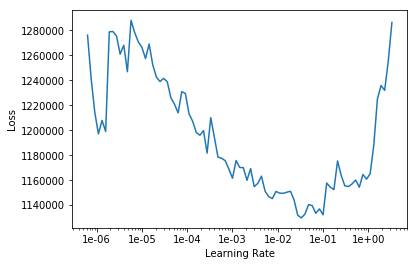

In [94]:
learn.lr_find()
learn.recorder.plot()

In [95]:
learn.fit(5,1e-4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1183680.625000,30033070.000000,2339.384766,00:04
1,1188228.500000,524121276416.000000,182072.328125,00:04
2,1189332.250000,3937054208.000000,16684.349609,00:04
3,1188907.250000,1504013440.000000,10690.123047,00:04
4,1164822.500000,108216840.000000,3581.829102,00:04


In [0]:
learn.save('modelA_1758')

In [93]:
learn.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1240062.500000,7490052096.000000,22648.152344,00:04
1,1207816.750000,2506240000.000000,13511.615234,00:04
2,1215824.000000,1167646.250000,1074.479980,00:04
3,1205781.625000,1156757.375000,1068.703003,00:04
4,1188793.875000,42184644.000000,2595.814453,00:04


In [0]:
learn.save('modelA_1066')

In [67]:
learn.fit_one_cycle(10,5e-8)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1232084.875000,1179454.250000,1080.920288,00:04
1,1288511.000000,1193726.500000,1087.667969,00:04
2,1268929.375000,1175462.875000,1078.977539,00:04
3,1238935.750000,1181331.500000,1081.717163,00:04
4,1211488.125000,1178079.500000,1080.263672,00:04
5,1239945.125000,1175270.625000,1078.930420,00:04
6,1250218.125000,1172910.125000,1077.749023,00:04
7,1247689.625000,1182773.000000,1082.533936,00:04
8,1253388.000000,1195963.125000,1088.751709,00:04
9,1190297.625000,1173580.375000,1078.029541,00:04


In [0]:
learn.save('modelC_1066')

In [0]:
a=learn.get_preds(DatasetType.Test)[0].cpu()

In [0]:
a[:,0]

tensor([1402.9058, 1313.4417,  493.5687,  ..., 1521.0078, 2922.8735,
         977.4575])

In [0]:
result=pd.DataFrame([df_test['Item_Identifier'],df_test['Outlet_Identifier']])

In [0]:
res=result.head().T

In [0]:
res['Item_Outlet_Sales']=a[:,0]

In [0]:
learn.data.test_ds[0:3]

LabelList (3 items)
x: TabularList
Item_Identifier                          FDW58
Item_Weight                            1.87123
Item_Fat_Content                       Low Fat
Item_Visibility                       -1.13609
Item_Type                          Snack Foods
Item_MRP                             -0.536877
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                            0
Item_Weight_na                           False
Name: 0, dtype: object,Item_Identifier                          FDW14
Item_Weight                           -1.07004
Item_Fat_Content                           reg
Item_Visibility                      -0.539781
Item_Type                                Dairy
Item_MRP                             -0.867598
Outlet_Identifier                       OUT017
Ou

In [0]:
res.to_excel('BigMarket3.xls')

In [0]:
df_train.loc[6034]

Item_Identifier                          FDJ16
Item_Weight                              9.195
Item_Fat_Content                       Low Fat
Item_Visibility                       0.114886
Item_Type                         Frozen Foods
Item_MRP                               59.6246
Outlet_Identifier                       OUT046
Outlet_Establishment_Year                 1997
Outlet_Size                              Small
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      1100.57
Name: 6034, dtype: object

In [0]:
learn.get_preds(DatasetType.Test)[0].cpu

<function Tensor.cpu>

In [0]:
result['Item_Identifier']=df_test['Item_Identifier']
result['Outlet_Identifier']=df_test['Outlet_Identifier']
result['Item_Outlet_Sales']=learn.get_preds(DatasetType.Test)[0]

TypeError: ignored

In [0]:
doc(learn.pred_batch[1])

TypeError: ignored

In [0]:
df_test.shape

(5681, 11)

In [0]:
x=iter(data.test_dl)

In [0]:
print(x)

<generator object DeviceDataLoader.__iter__ at 0x7f560f7c2258>
